# Preprocessing

## Initial setup

### Packages

In [135]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### Dataset reading

In [136]:
df = pd.read_csv('../data/dataset.csv')  # o pd.read_excel(...)
print(f"Dataset cargado: {df.shape[0]} filas × {df.shape[1]} columnas")
print(df.columns)

Dataset cargado: 21742 filas × 58 columnas
Index(['Unnamed: 0', 'id', 'title', 'subtitle', 'sq_mt_built', 'sq_mt_useful',
       'n_rooms', 'n_bathrooms', 'n_floors', 'sq_mt_allotment', 'latitude',
       'longitude', 'raw_address', 'is_exact_address_hidden', 'street_name',
       'street_number', 'portal', 'floor', 'is_floor_under', 'door',
       'neighborhood_id', 'operation', 'rent_price', 'rent_price_by_area',
       'is_rent_price_known', 'buy_price', 'buy_price_by_area',
       'is_buy_price_known', 'house_type_id', 'is_renewal_needed',
       'is_new_development', 'built_year', 'has_central_heating',
       'has_individual_heating', 'are_pets_allowed', 'has_ac',
       'has_fitted_wardrobes', 'has_lift', 'is_exterior', 'has_garden',
       'has_pool', 'has_terrace', 'has_balcony', 'has_storage_room',
       'is_furnished', 'is_kitchen_equipped', 'is_accessible',
       'has_green_zones', 'energy_certificate', 'has_parking',
       'has_private_parking', 'has_public_parking',
  

Nos quedamos con las columnas que queremos preprocesar

In [137]:
columns = ['street_name',
           'floor',
           'house_type_id',
           'has_central_heating',
           'has_individual_heating'
        ]
df = df[columns]

### NaN analysis

Vemos la información de cuantos valores nulos tienen

In [138]:
nulls = df.isnull().mean() * 100
print("Porcentage de nulos por columna:")
display(nulls.sort_values(ascending=False))

Porcentage de nulos por columna:


has_central_heating       37.411462
has_individual_heating    37.411462
street_name               27.159415
floor                     11.990617
house_type_id              1.798363
dtype: float64

### Distinct values analysis

Valores únicos en street_name:
street_name
NaN                                     5905
Paseo de la Castellana                   116
Calle de Bravo Murillo                    69
Calle del Príncipe de Vergara             60
Calle de Embajadores                      58
                                        ... 
Calle Peonias                              1
Calle de Hermenegildo Bielsa               1
Avenida de los arces                       1
Calle del Estrecho de Mesina, Madrid       1
Calle Burriana                             1
Name: count, Length: 6163, dtype: int64
---------
Valores únicos en floor:
floor
1                       4440
2                       3546
3                       3001
NaN                     2607
4                       2323
Bajo                    2144
5                       1310
6                        913
7                        556
8                        326
Entreplanta exterior     236
9                        181
Semi-sótano exterior      55
Semi

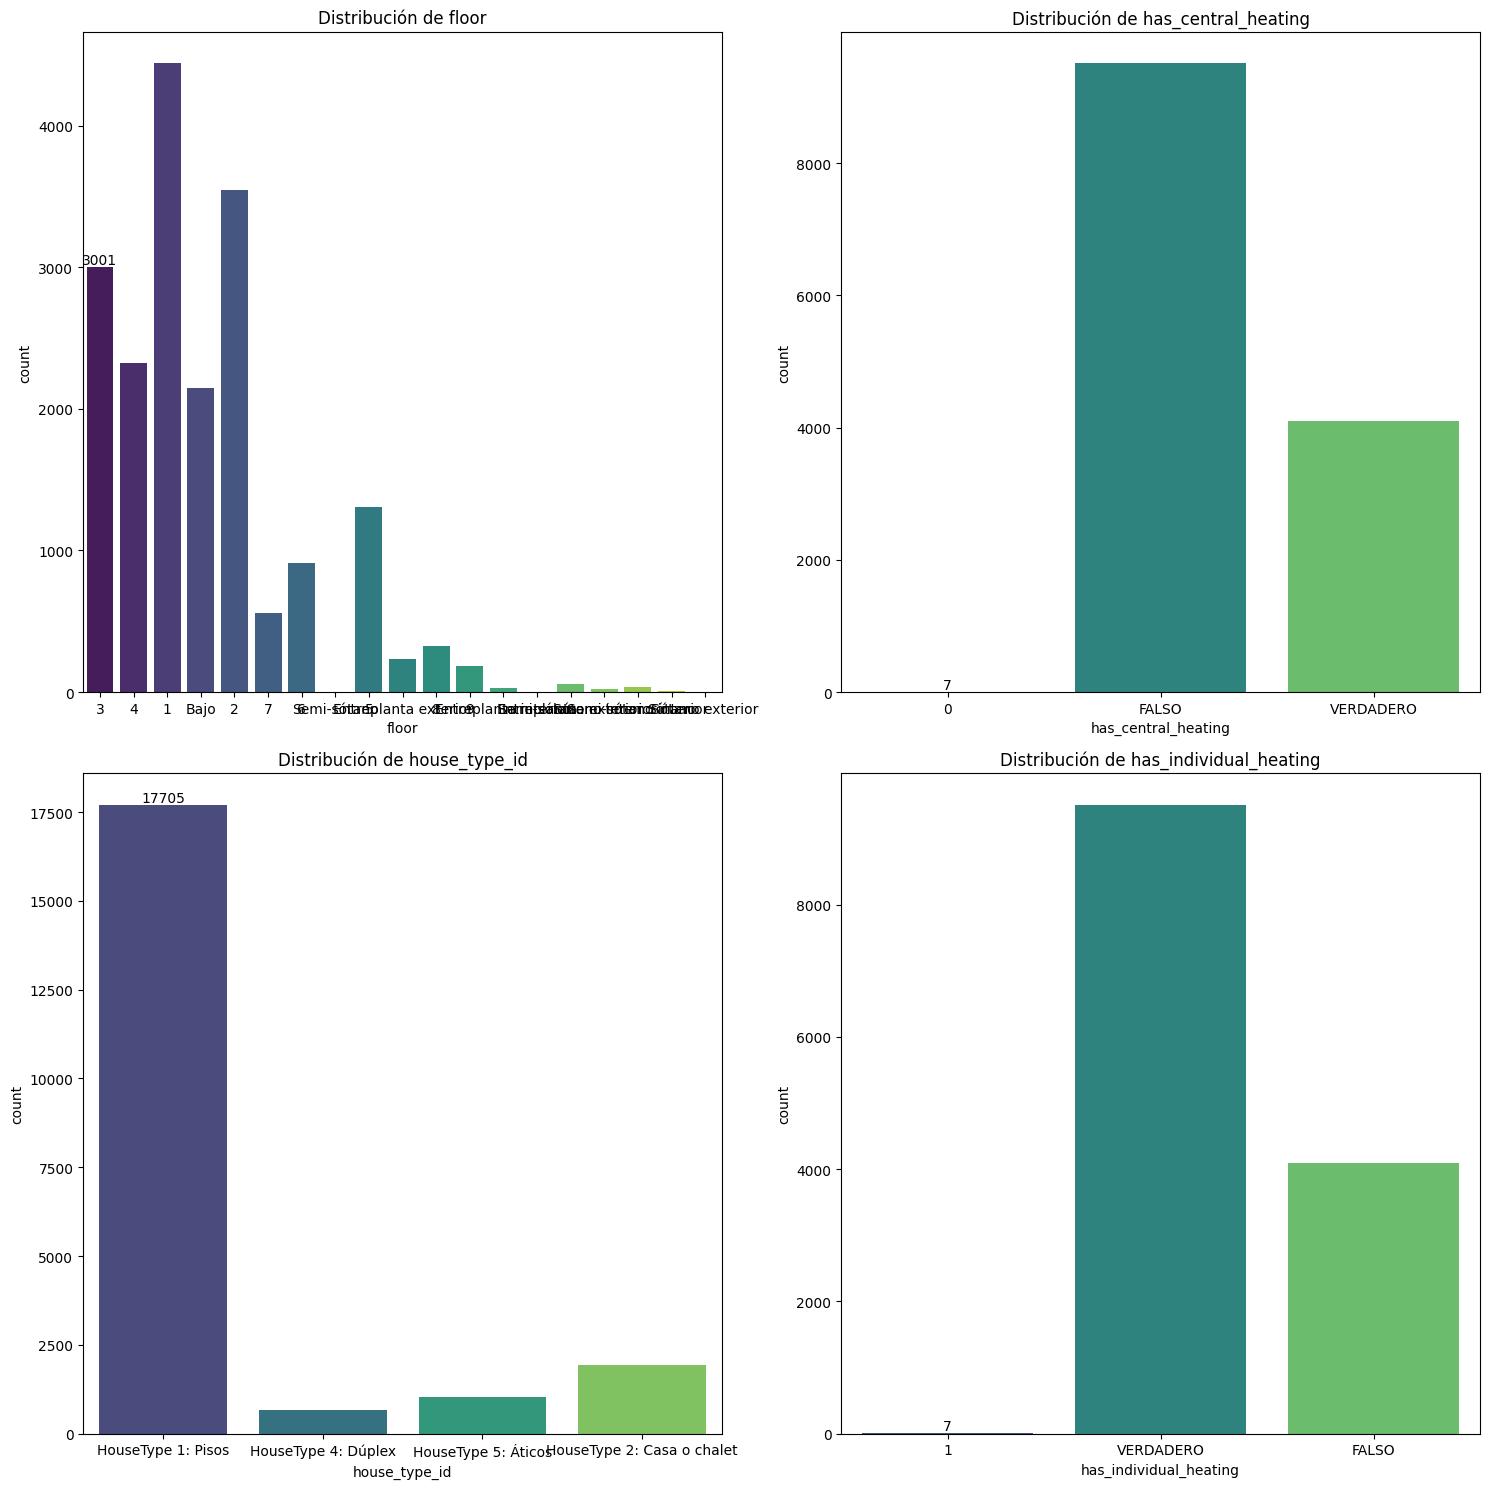

In [139]:
print("Valores únicos en street_name:")
print(df['street_name'].value_counts(dropna=False))
print('---------')

print("Valores únicos en floor:")
print(df['floor'].value_counts(dropna=False))
print('---------')

print("Valores únicos en house_type_id:")
print(df['house_type_id'].value_counts(dropna=False))
print('---------')

print("Valores únicos en has_central_heating:")
print(df['has_central_heating'].value_counts(dropna=False))
print('---------')

print("Valores únicos en has_individual_heating:")
print(df['has_individual_heating'].value_counts(dropna=False))
print('---------')

fig, axes = plt.subplots(2, 2, figsize=(15, 15))


sns.countplot(x='floor', data=df, ax=axes[0][0], palette='viridis')
axes[0][0].set_title('Distribución de floor')
axes[0][0].set_xlabel('floor')
axes[0][0].bar_label(axes[0][0].containers[0])

sns.countplot(x='house_type_id', data=df, ax=axes[1][0], palette='viridis')
axes[1][0].set_title('Distribución de house_type_id')
axes[1][0].set_xlabel('house_type_id')
axes[1][0].bar_label(axes[1][0].containers[0])

sns.countplot(x='has_central_heating', data=df, ax=axes[0][1], palette='viridis')
axes[0][1].set_title('Distribución de has_central_heating')
axes[0][1].set_xlabel('has_central_heating')
axes[0][1].bar_label(axes[0][1].containers[0])

sns.countplot(x='has_individual_heating', data=df, ax=axes[1][1], palette='viridis')
axes[1][1].set_title('Distribución de has_individual_heating')
axes[1][1].set_xlabel('has_individual_heating')
axes[1][1].bar_label(axes[1][1].containers[0])

plt.tight_layout()
plt.show()

## Column preprocessing

### Preprocess floor column

#### Standarization


Value counts
floor
 9.0     181
 8.0     326
 7.0     556
 6.0     913
 5.0    1310
 4.0    2323
 3.0    3001
 2.0    3546
 1.0    4440
 0.5     271
 0.0    2144
-0.5      92
-1.0      32
 NaN    2607
Name: count, dtype: int64
------------------------------------------------------------------------------
Mitjana: 2.6151816043898615
Mediana: 2.0
------------------------------------------------------------------------------


<Axes: title={'center': 'Floor distribution'}, ylabel='Frequency'>

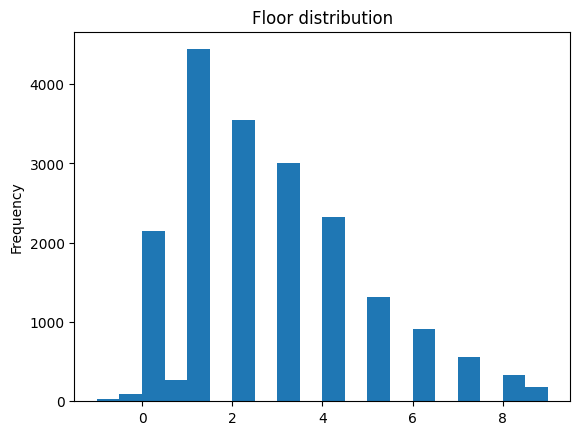

In [140]:
floor_map = {
    'Bajo': 0,
    'Entreplanta': 0.5,
    'Entreplanta interior': 0.5,
    'Entreplanta exterior': 0.5,
    'Semi-sótano': -0.5,
    'Semi-sótano interior': -0.5,
    'Semi-sótano exterior': -0.5,
    'Sótano': -1,
    'Sótano interior': -1,
    'Sótano exterior': -1
}

df['floor'] = df['floor'].replace(floor_map)
df['floor'] = pd.to_numeric(df['floor'], errors='coerce')

print("Value counts")
print(df['floor'].value_counts(dropna=False).sort_index(ascending=False))
print("------------------------------------------------------------------------------")
print("Mitjana:", df['floor'].mean())
print("Mediana:", df['floor'].median())
print("------------------------------------------------------------------------------")

df['floor'].plot(kind='hist', bins=20, title='Floor distribution')


Imputamos los valores nulos de floor. Se usa KNN para obtener un resultado lo más fiel posible.

Comprobamos que se han eliminado todos los valores nulos

In [141]:
# print("Value counts")
# print(df['floor_imputed'].value_counts(dropna=False).sort_index(ascending=False))
# print("------------------------------------------------------------------------------")
# print("Mitjana:", df['floor_imputed'].mean())
# print("Mediana:", df['floor_imputed'].median())
# print("------------------------------------------------------------------------------")

# df['floor_imputed'].plot(kind='hist', bins=20, title='Floor distribution')

### Preprocess house type column

#### Standarization and renaming

In [142]:
house_type_map = {
    'HouseType 1: Pisos' : 'Piso',
    'HouseType 2: Casa o chalet' : 'Casa',
    'HouseType 5: Áticos': 'Ático',
    'HouseType 4: Dúplex': 'Dúplex',
}

df['house_type'] = df['house_type_id'].replace(house_type_map)

print("Valores únicos en house_type:")
print(df['house_type'].value_counts(dropna=False))

Valores únicos en house_type:
house_type
Piso      17705
Casa       1938
Ático      1032
Dúplex      676
NaN         391
Name: count, dtype: int64


#### Imputation of missing values

Hay muy pocos valores nulos, de modo que podemos permitirnos imputarlos por la mediana.

In [143]:
df['house_type'].fillna(df['house_type'].mode()[0], inplace=True)

print("Valores únicos en house_type:")
print(df['house_type'].value_counts(dropna=False))

# fig, axes = plt.subplots(1, 1)
# sns.countplot(x='house_type', data=df, ax=axes, palette='viridis')
# axes.set_title('Distribución de house_type')
# axes.set_xlabel('house_type')
# axes.bar_label(axes.containers[0])

# plt.tight_layout()
# plt.show()

Valores únicos en house_type:
house_type
Piso      18096
Casa       1938
Ático      1032
Dúplex      676
Name: count, dtype: int64


### Preprocess heating_type column

#### Standarization and renaming

In [144]:
def determine_heating_type(row):
    if str(row['has_central_heating']).upper() in ['VERDADERO', '1']:
        return 'central'
    elif str(row['has_individual_heating']).upper() in ['VERDADERO', '1']:
        return 'individual'
    else:
        return 'unknown'

# Apply the function
df['heating_type'] = df.apply(determine_heating_type, axis=1)

print("Valores únicos en heating_type:")
print(df['heating_type'].value_counts(dropna=False))

Valores únicos en heating_type:
heating_type
individual    9516
unknown       8134
central       4092
Name: count, dtype: int64


### Preprocess street name column

#### Imputation of null values

In [145]:
df['street_name'] = df['street_name'].fillna('unknown')

print("Valores únicos en street_name:")
print(df['street_name'].value_counts(dropna=False))


Valores únicos en street_name:
street_name
unknown                                 5905
Paseo de la Castellana                   116
Calle de Bravo Murillo                    69
Calle del Príncipe de Vergara             60
Calle de Embajadores                      58
                                        ... 
Calle Peonias                              1
Calle de Hermenegildo Bielsa               1
Avenida de los arces                       1
Calle del Estrecho de Mesina, Madrid       1
Calle Burriana                             1
Name: count, Length: 6163, dtype: int64


### Final processing

#### Delete old columns

In [146]:
if 'has_central_heating' in df.columns:
    df.drop('has_central_heating', axis=1, inplace=True)
if 'has_individual_heating' in df.columns:
    df.drop('has_individual_heating', axis=1, inplace=True)
if 'house_type_id' in df.columns:
    df.drop('house_type_id', axis=1, inplace=True)

## Final results

In [147]:
df.head()
nulls = df.isnull().mean() * 100
print("Porcentage de nulos por columna:")
display(nulls.sort_values(ascending=False))

Porcentage de nulos por columna:


floor           11.990617
street_name      0.000000
house_type       0.000000
heating_type     0.000000
dtype: float64